In [1]:
import os
import sys
import shutil
import math
import warnings
from typing import *
from enum import Enum
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# sys.path.append("/Users/esraan/Library/CloudStorage/GoogleDrive-esraan@post.bgu.ac.il/My Drive/PhD materials/UpdatedCellDeathQuantification/CellDeathQuantification/QuantificationScripts")
from QuantificationScripts.NucleationAndPropagationMeasurements import *
from OldCodeBase_15072021.NucliatorsCount import NucleatorsCounter 
from OldCodeBase_15072021.NucleationProbabilityAndSPI import NucleationProbabilityAndSPI 
from RegenratingPreviousResultsScripts.PreviousResultsUtils import *
from OldDataSimulation.DataSimulationGif import *

Area of the circle in the first quarter: -8.0


In [2]:
exps_dir_name = "/Users/esraan/Library/CloudStorage/GoogleDrive-esraan@post.bgu.ac.il/My Drive/PhD materials/2023DataSet/CSVs_trackmate_fiji"
"/Users/yishaiazabary/PycharmProjects/University/CellDeathQuantification/Data/2023 data/OriginalTimeFramesData"
meta_data_file_full_path= "/Users/esraan/Library/CloudStorage/GoogleDrive-esraan@post.bgu.ac.il/My Drive/PhD materials/2023DataSet/2023ExperimentsMetaData.csv"
meta_data_extract_exp_names= pd.read_csv(meta_data_file_full_path)
exp_names = list(meta_data_extract_exp_names.iloc[8:12,1])

In [3]:
exps_dir_name = "/Users/esraan/Library/CloudStorage/GoogleDrive-esraan@post.bgu.ac.il/My Drive/PhD materials/2023DataSet/CSVs_trackmate_fiji"
"/Users/yishaiazabary/PycharmProjects/University/CellDeathQuantification/Data/2023 data/OriginalTimeFramesData"
meta_data_file_full_path= "/Users/esraan/Library/CloudStorage/GoogleDrive-esraan@post.bgu.ac.il/My Drive/PhD materials/2023DataSet/2023ExperimentsMetaData.csv"
meta_data_extract_exp_names= pd.read_csv(meta_data_file_full_path)
exp_names = list(meta_data_extract_exp_names.iloc[8:12,1])
distribution_of_deltaTODs_value = values_distribution_of_distances_or_delta_TODs_for_each_nighbors_pairs(returned_value ="TODs",
                                                                                           exp_name=exp_names,
                                                                       exps_dir_path= exps_dir_name,
                                                                       meta_data_full_file_path= meta_data_file_full_path
                                                                       )
distribution_of_distances_value = values_distribution_of_distances_or_delta_TODs_for_each_nighbors_pairs(returned_value ="distances",
                                                                                           exp_name=exp_names,
                                                                       exps_dir_path= exps_dir_name,
                                                                       meta_data_full_file_path= meta_data_file_full_path
                                                                       )
all_exp_results_local_density_values = calc_exp_all_cells_local_densities_for_distribution(exp_name = exp_names,
                                                                                           exps_dir_path=exps_dir_name,
                                                                                           meta_data_full_file_path=meta_data_file_full_path,
                                                                                           radious_for_density = 100)

In [4]:
melted_distances_distribution_df = pd.DataFrame.from_dict(format_melt_df_distribution_values(exp_names=exp_names, 
                                                                                                        dict_of_exp_values_of_the_designated_variable_density_deltaTODs_distances=distribution_of_distances_value,
                                                                                                        meta_data_full_file_path=meta_data_file_full_path,
                                                                                                        name_of_the_melted_variable="distances_values",
                                                                                                        Density_needed=True))

melted_delta_tods_distribution_df = pd.DataFrame.from_dict(format_melt_df_distribution_values(exp_names=exp_names, 
                                                                                                        dict_of_exp_values_of_the_designated_variable_density_deltaTODs_distances=distribution_of_deltaTODs_value,
                                                                                                        meta_data_full_file_path=meta_data_file_full_path,
                                                                                                        name_of_the_melted_variable="delta_tods_value",
                                                                                                        Density_needed=True))

melted_local_densities_distribution_df = pd.DataFrame.from_dict(format_melt_df_distribution_values(exp_names=exp_names,
                                                                                                        dict_of_exp_values_of_the_designated_variable_density_deltaTODs_distances=all_exp_results_local_density_values,
                                                                                                        meta_data_full_file_path=meta_data_file_full_path,
                                                                                                        name_of_the_melted_variable="Local_density",
                                                                                                        Density_needed=True))
df_1 = melted_distances_distribution_df.melt(id_vars=["Experiment_name","Density","Treatment"])
df_2 = melted_delta_tods_distribution_df.melt(id_vars=["Experiment_name","Density","Treatment"])
df_3 = melted_local_densities_distribution_df.melt(id_vars=["Experiment_name","Density","Treatment"])

visualize_delta_tods_distances_local_densities_distribution_melted = pd.concat([df_1,df_2,df_3])

2023_05_17_2023_05_11_red nuclei_7min_interval_dense_colony_death_times_no_reapearing_death_events.csv
2023_05_17_2023_05_10_red nuclei_7min_interval_sparse1_colony_death_times_no_reapearing_death_events.csv
2023_05_17_2023_05_10_red nuclei_7min_interval_sparse2_colony_death_times_no_reapearing_death_events.csv
5-11-23_10agreennuclei_facnbso+ml162_computational001_crop_2023_05_11_dense_colony_death_times_no_reapearing_death_events.csv
2023_05_17_2023_05_11_red nuclei_7min_interval_dense_colony_death_times_no_reapearing_death_events.csv
2023_05_17_2023_05_10_red nuclei_7min_interval_sparse1_colony_death_times_no_reapearing_death_events.csv
2023_05_17_2023_05_10_red nuclei_7min_interval_sparse2_colony_death_times_no_reapearing_death_events.csv
5-11-23_10agreennuclei_facnbso+ml162_computational001_crop_2023_05_11_dense_colony_death_times_no_reapearing_death_events.csv
2023_05_17_2023_05_11_red nuclei_7min_interval_dense_colony_death_times_no_reapearing_death_events.csv
2023_05_17_2023_05_

In [5]:

def replacing_name(long_ugly_name=""):
    if "sparse1" in long_ugly_name.lower():
        return "sparse1"
    elif "sparse2" in long_ugly_name.lower():
        return "sparse2"
    elif "interval_dense_" in long_ugly_name.lower():
        return "dense1"
    else:
        return "dense2"
visualize_delta_tods_distances_local_densities_distribution_melted["treatment_density"] = [replacing_name(item) for item in visualize_delta_tods_distances_local_densities_distribution_melted["Experiment_name"]]

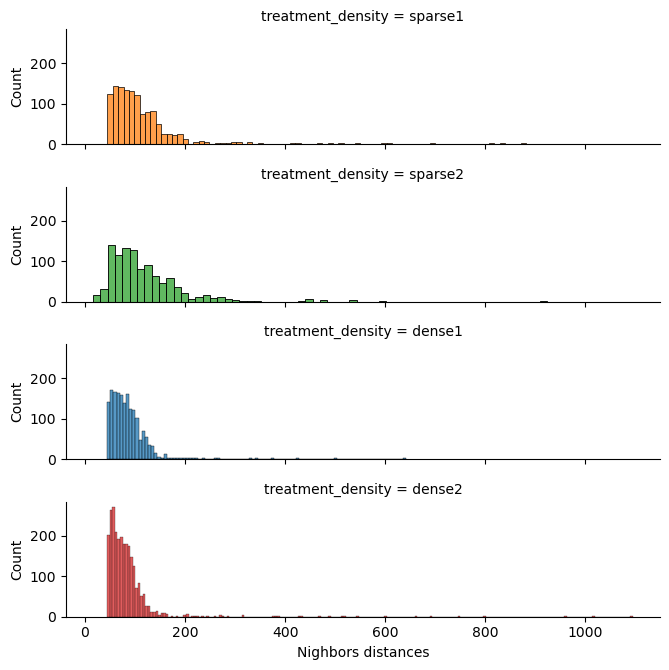

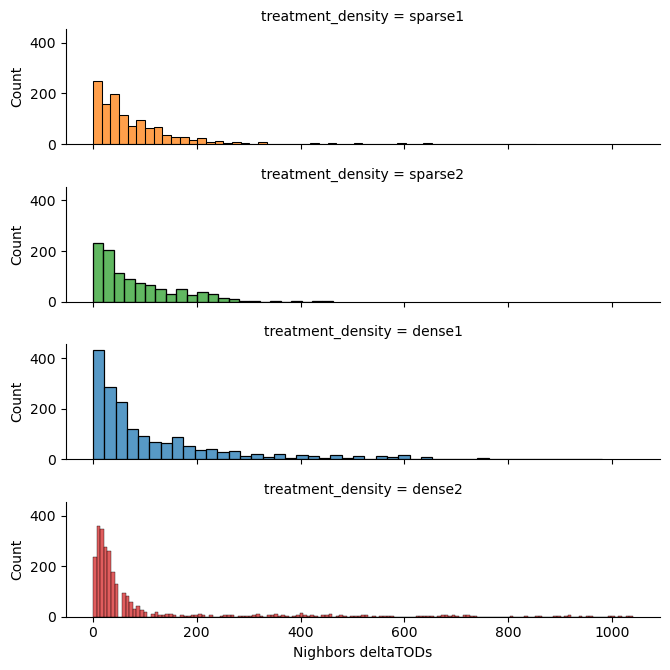

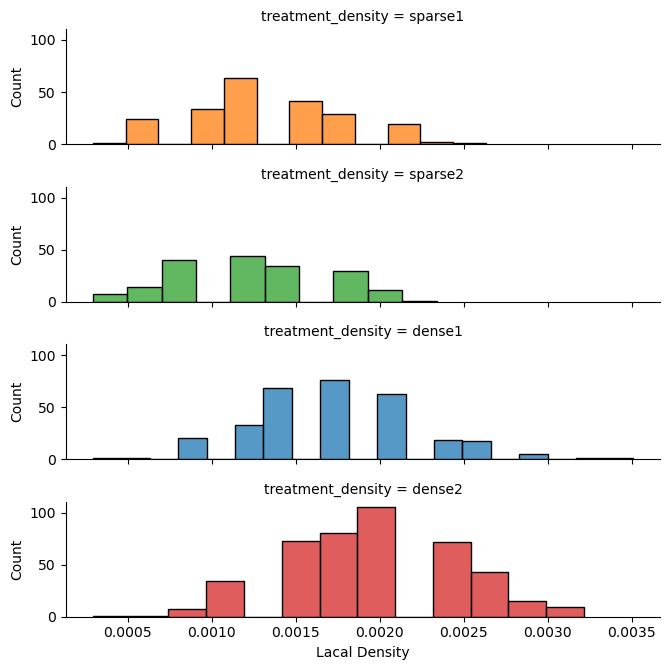

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.FacetGrid(visualize_delta_tods_distances_local_densities_distribution_melted[visualize_delta_tods_distances_local_densities_distribution_melted["variable"]=="distances_values"], row="treatment_density", 
                  height=1.7, aspect=4,row_order=["sparse1","sparse2","dense1","dense2"], hue="treatment_density")
g.map(sns.histplot, "value")
plt.xlabel('Nighbors distances')
# g.set(xlim=(0,600))



g = sns.FacetGrid(visualize_delta_tods_distances_local_densities_distribution_melted[visualize_delta_tods_distances_local_densities_distribution_melted["variable"]=="delta_tods_value"], row="treatment_density", 
                  height=1.7, aspect=4,row_order=["sparse1","sparse2","dense1","dense2"],hue="treatment_density")
g.map(sns.histplot, "value")
plt.xlabel('Nighbors deltaTODs')
# g.set(xlim=(0,800))

g = sns.FacetGrid(visualize_delta_tods_distances_local_densities_distribution_melted[visualize_delta_tods_distances_local_densities_distribution_melted["variable"]=="Local_density"], row="treatment_density", 
                  height=1.7, aspect=4,row_order=["sparse1","sparse2","dense1","dense2"],hue="treatment_density")
g.map(sns.histplot, "value")
plt.xscale("linear")
plt.xlabel('Lacal Density')
# g.set(xlim=(0,0.001))

plt.show()

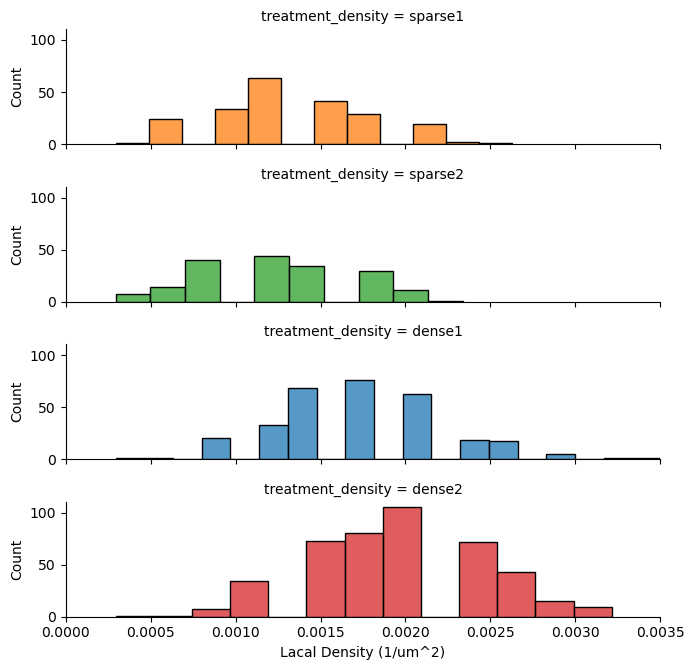

In [7]:
g = sns.FacetGrid(visualize_delta_tods_distances_local_densities_distribution_melted[visualize_delta_tods_distances_local_densities_distribution_melted["variable"]=="Local_density"], row="treatment_density", 
                  height=1.7, aspect=4,row_order=["sparse1","sparse2","dense1","dense2"],hue="treatment_density")
g.map(sns.histplot, "value")
# plt.xscale("log")
plt.xlabel('Lacal Density (1/um^2)')
g.set(xlim=(0,0.0035))

plt.show()

# Previuos Data Local Density

In [26]:
#OLD DATA
exps_dir_name = "/Users/esraan/Library/CloudStorage/GoogleDrive-esraan@post.bgu.ac.il/My Drive/PhD materials/OldData/Experiments_XYT_CSV/OriginalTimeFramesData"
"/Users/yishaiazabary/PycharmProjects/University/CellDeathQuantification/Data/2023 data/OriginalTimeFramesData"
meta_data_file_full_path= "/Users/esraan/Library/CloudStorage/GoogleDrive-esraan@post.bgu.ac.il/My Drive/PhD materials/OldData/Experiments_XYT_CSV/ExperimentsMetaData.csv"
meta_data_extract_exp_names= pd.read_csv(meta_data_file_full_path)
exp_names = meta_data_extract_exp_names.iloc[:96,1]

all_prevoius_exp_results_local_density_values = calc_exp_all_cells_local_densities_for_distribution(exp_name = list(exp_names),
                                                                                           exps_dir_path=exps_dir_name,
                                                                                           meta_data_full_file_path=meta_data_file_full_path,
                                                                                           radious_for_density = 100)
melted_local_densities_distribution_previous_exp_df = pd.DataFrame.from_dict(format_melt_df_distribution_values(exp_names=exp_names,
                                                                                                        dict_of_exp_values_of_the_designated_variable_density_deltaTODs_distances=all_prevoius_exp_results_local_density_values,
                                                                                                        meta_data_full_file_path=meta_data_file_full_path,
                                                                                                        name_of_the_melted_variable="Local_density",
                                                                                                        Density_needed=False))
previous_exp_local_density = melted_local_densities_distribution_previous_exp_df.melt(id_vars=["Experiment_name","Treatment"])
previous_exp_local_density["Sh_Treatment"] = [replace_ugly_long_name(item) for item in previous_exp_local_density["Experiment_name"]]

In [27]:
#OLD DATA
exps_dir_name = "/Users/esraan/Library/CloudStorage/GoogleDrive-esraan@post.bgu.ac.il/My Drive/PhD materials/OldData/Experiments_XYT_CSV/OriginalTimeFramesData"
"/Users/yishaiazabary/PycharmProjects/University/CellDeathQuantification/Data/2023 data/OriginalTimeFramesData"
meta_data_file_full_path= "/Users/esraan/Library/CloudStorage/GoogleDrive-esraan@post.bgu.ac.il/My Drive/PhD materials/OldData/Experiments_XYT_CSV/ExperimentsMetaData.csv"
meta_data_extract_exp_names= pd.read_csv(meta_data_file_full_path)
exp_names = meta_data_extract_exp_names.iloc[:96,1]

all_prevoius_exp_results_local_density_values = calc_exp_all_cells_local_densities_for_distribution(exp_name = list(exp_names),
                                                                                           exps_dir_path=exps_dir_name,
                                                                                           meta_data_full_file_path=meta_data_file_full_path,
                                                                                           radious_for_density = 100)
melted_local_densities_distribution_previous_exp_df = pd.DataFrame.from_dict(format_melt_df_distribution_values(exp_names=exp_names,
                                                                                                        dict_of_exp_values_of_the_designated_variable_density_deltaTODs_distances=all_prevoius_exp_results_local_density_values,
                                                                                                        meta_data_full_file_path=meta_data_file_full_path,
                                                                                                        name_of_the_melted_variable="Local_density",
                                                                                                        Density_needed=False))
previous_exp_local_density = melted_local_densities_distribution_previous_exp_df.melt(id_vars=["Experiment_name","Treatment"])
# exp_cell_line= meta_data_file_full_path[meta_data_file_full_path["File Name"]== key]["Cell Line"].values[0]
previous_exp_local_density["Sh_Treatment"] = [replace_ugly_long_name(item, item) for item in previous_exp_local_density["Experiment_name"]]


In [7]:
def replacing_name_1(long_ugly_name=""):
    if "sparse1" in long_ugly_name.lower():
        return "sparse- FAC&BSO"
    elif "sparse2" in long_ugly_name.lower():
        return "sparse- FAC&BSO"
    elif "interval_dense_" in long_ugly_name.lower():
        return "dense- FAC&BSO"
    else:
        return "dense- FAC&BSO"

In [8]:
# NEW DATA
exps_dir_name_new = "/Users/esraan/Library/CloudStorage/GoogleDrive-esraan@post.bgu.ac.il/My Drive/PhD materials/2023DataSet/CSVs_trackmate_fiji"
"/Users/yishaiazabary/PycharmProjects/University/CellDeathQuantification/Data/2023 data/OriginalTimeFramesData"
meta_data_file_full_path_new= "/Users/esraan/Library/CloudStorage/GoogleDrive-esraan@post.bgu.ac.il/My Drive/PhD materials/2023DataSet/2023ExperimentsMetaData.csv"
meta_data_extract_exp_names_new= pd.read_csv(meta_data_file_full_path_new)
exp_names_new = meta_data_extract_exp_names_new.iloc[8:12,1]

all_new_exp_results_local_density_values = calc_exp_all_cells_local_densities_for_distribution(exp_name = list(exp_names_new),
                                                                                           exps_dir_path=exps_dir_name_new,
                                                                                           meta_data_full_file_path=meta_data_file_full_path_new,
                                                                                           radious_for_density = 100)

melted_local_densities_distribution_new_exp_df= pd.DataFrame.from_dict(format_melt_df_distribution_values(exp_names=exp_names_new,
                                                                                                        dict_of_exp_values_of_the_designated_variable_density_deltaTODs_distances=all_new_exp_results_local_density_values,
                                                                                                        meta_data_full_file_path=meta_data_file_full_path_new,
                                                                                                        name_of_the_melted_variable="Local_density",
                                                                                                        Density_needed=True))

new_exp_local_density = melted_local_densities_distribution_new_exp_df.melt(id_vars=["Experiment_name","Treatment","Density"])

new_exp_local_density["Sh_Treatment"] = [replacing_name_1(item) for item in new_exp_local_density["Experiment_name"]]
all_exp_new_and_previous_local_density = pd.concat([new_exp_local_density,previous_exp_local_density])

2023_05_17_2023_05_11_red nuclei_7min_interval_dense_colony_death_times_no_reapearing_death_events.csv
2023_05_17_2023_05_10_red nuclei_7min_interval_sparse1_colony_death_times_no_reapearing_death_events.csv
2023_05_17_2023_05_10_red nuclei_7min_interval_sparse2_colony_death_times_no_reapearing_death_events.csv
5-11-23_10agreennuclei_facnbso+ml162_computational001_crop_2023_05_11_dense_colony_death_times_no_reapearing_death_events.csv


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
Figure=sns.boxplot(y='Density', x='value', data= new_exp_local_density, orient="h")
plt.title("Local Densities among all Treatments")
plt.xlabel("Local density (um^2)^-1")
plt.ylabel("Treatments")
Figure.tick_params(axis='x', rotation=90)
# Figure.set(xscale="log")
plt.show()

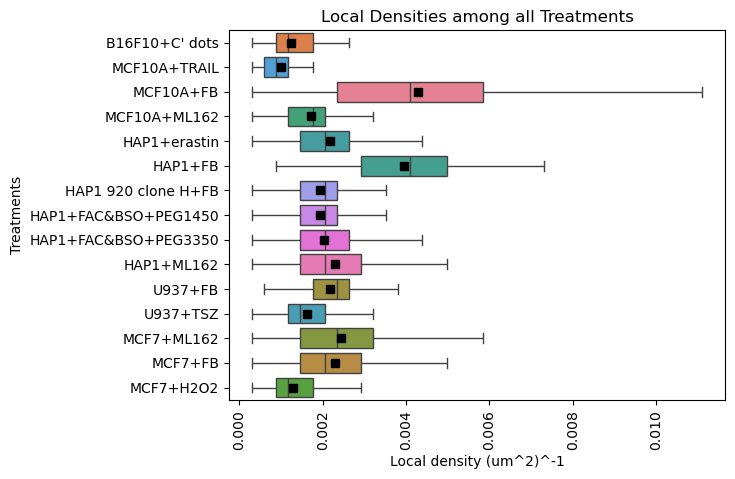

In [30]:

import seaborn as sns
import matplotlib.pyplot as plt
Figure=sns.boxplot(y='Sh_Treatment', x='value', data= previous_exp_local_density, orient="h", showfliers=False, showmeans=True,\
    hue="Sh_Treatment", meanprops={"marker":"s","markerfacecolor":"black", "markeredgecolor":"black"},
    order=["B16F10+C' dots",'MCF10A+TRAIL', 'MCF10A+FB','MCF10A+ML162','HAP1+erastin','HAP1+FB','HAP1 920 clone H+FB','HAP1+FAC&BSO+PEG1450',"HAP1+FAC&BSO+PEG3350", 'HAP1+ML162', 'U937+FB', 'U937+TSZ','MCF7+ML162','MCF7+FB','MCF7+H2O2'])

plt.title("Local Densities among all Treatments")
plt.xlabel("Local density (um^2)^-1")
plt.ylabel("Treatments")
Figure.tick_params(axis='x', rotation=90)
# Figure.set(xscale="log")
plt.show()



In [53]:
MCF10A_local_density = previous_exp_local_density[previous_exp_local_density["Sh_Treatment"].str.contains("ML162")]#previous_exp_local_density["Sh_Treatment"].str.contains("FAC")|previous_exp_local_density["Sh_Treatment"].str.contains("FB")

In [37]:
MCF10A_local_density

,Experiment_name,Treatment,variable,value,Sh_Treatment
0,20160820_10A_FB_xy11.csv,DMEM/F12-AA+400uM FAC&BSO,Local_density,0.000292,MCF10A+FB
1,20160820_10A_FB_xy11.csv,DMEM/F12-AA+400uM FAC&BSO,Local_density,0.001170,MCF10A+FB
2,20160820_10A_FB_xy11.csv,DMEM/F12-AA+400uM FAC&BSO,Local_density,0.000585,MCF10A+FB
3,20160820_10A_FB_xy11.csv,DMEM/F12-AA+400uM FAC&BSO,Local_density,0.001462,MCF10A+FB
4,20160820_10A_FB_xy11.csv,DMEM/F12-AA+400uM FAC&BSO,Local_density,0.002047,MCF10A+FB
...,...,...,...,...,...
22552,20181227_MCF10A_SKT_xy5.csv,DMEM/F12+50ng/mL superkiller TRAIL,Local_density,0.001170,MCF10A+TRAIL
22553,20181227_MCF10A_SKT_xy5.csv,DMEM/F12+50ng/mL superkiller TRAIL,Local_density,0.000292,MCF10A+TRAIL
22554,20181227_MCF10A_SKT_xy5.csv,DMEM/F12+50ng/mL superkiller TRAIL,Local_density,0.001170,MCF10A+TRAIL
22555,20181227_MCF10A_SKT_xy5.csv,DMEM/F12+50ng/mL superkiller TRAIL,Local_density,0.000877,MCF10A+TRAIL


/var/folders/j0/1phmklgx147_1zwyhdlsqgq40000gn/T/ipykernel_984/4135295529.py:3: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  Figure=sns.boxplot(y='Sh_Treatment', x='value', data= MCF10A_local_density, orient="h", showfliers=False, showmeans=True,\


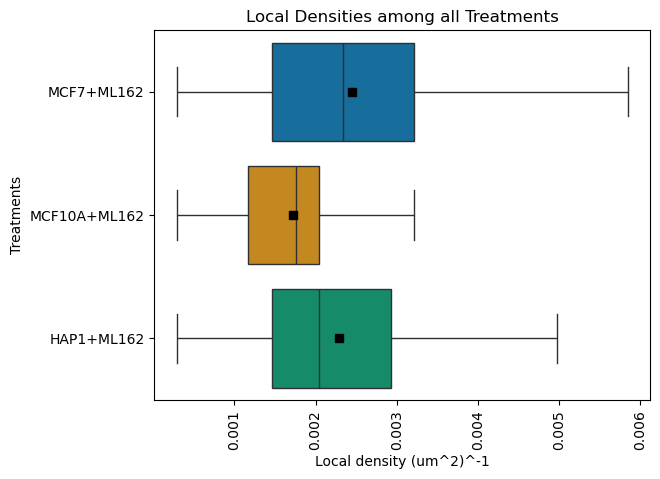

In [54]:

import seaborn as sns
import matplotlib.pyplot as plt
Figure=sns.boxplot(y='Sh_Treatment', x='value', data= MCF10A_local_density, orient="h", showfliers=False, showmeans=True,\
    palette = sns.color_palette("colorblind"),hue="Sh_Treatment", meanprops={"marker":"s","markerfacecolor":"black", "markeredgecolor":"black"})
    #,order=['HAP1+erastin','HAP1+FB',"HAP1+FAC&BSO+PEG3350",'HAP1 920 clone H+FB','HAP1+FAC&BSO+PEG1450', 'HAP1+ML162'])#['MCF7+ML162','MCF7+FB','MCF7+H2O2'])#['MCF10A+TRAIL', 'MCF10A+FB','MCF10A+ML162'])
plt.title("Local Densities among all Treatments")
plt.xlabel("Local density (um^2)^-1")
plt.ylabel("Treatments")
Figure.tick_params(axis='x', rotation=90)
# Figure.set(xscale="log")
plt.show()



## OLD-Data visulazation

drawing exp_name20160820_10A_FB_xy11.csv
drawing exp_name20160820_10A_FB_xy12.csv
drawing exp_name20160820_10A_FB_xy13.csv
drawing exp_name20160820_10A_FB_xy14.csv
drawing exp_name20160820_10A_FB_xy15.csv
drawing exp_name20160828_10AsgCx43_FB_xy01.csv
drawing exp_name20160828_10AsgCx43_FB_xy02.csv
drawing exp_name20160828_10AsgCx43_FB_xy03.csv
drawing exp_name20160828_10AsgCx43_FB_xy04.csv
drawing exp_name20160828_10AsgCx43_FB_xy05.csv
drawing exp_name20160828_10AsgCx43_FB_xy06.csv
drawing exp_name20160828_10AsgCx43_FB_xy07.csv
drawing exp_name20160828_10AsgCx43_FB_xy08.csv
drawing exp_name20160828_10AsgCx43_FB_xy09.csv
drawing exp_name20160828_10AsgCx43_FB_xy10.csv
drawing exp_name20160828_10AsgCx43_FB_xy11.csv
drawing exp_name20160828_10AsgCx43_FB_xy13.csv
drawing exp_name20160828_10Awt_FB_xy01.csv
drawing exp_name20160828_10Awt_FB_xy02.csv
drawing exp_name20160828_10Awt_FB_xy03.csv
drawing exp_name20160828_10Awt_FB_xy04.csv
drawing exp_name20160828_10Awt_FB_xy05.csv
drawing exp_name

drawing exp_name20160909_b16f10_aMSH_xy37.csv
drawing exp_name20160909_b16f10_aMSH_xy38.csv
drawing exp_name20160909_b16f10_aMSH_xy39.csv
drawing exp_name20160909_b16f10_aMSH_xy40.csv
drawing exp_name20161129_MCF7_FB_xy11.csv
drawing exp_name20161129_MCF7_FB_xy12.csv
drawing exp_name20161129_MCF7_FB_xy13.csv
drawing exp_name20161129_MCF7_FB_xy14.csv
drawing exp_name20161129_MCF7_FB_xy15.csv
drawing exp_name20170213_U937_FB_xy1.csv
drawing exp_name20170213_U937_FB_xy2.csv
drawing exp_name20170213_U937_FB_xy3.csv
drawing exp_name20170213_U937_FB_xy4.csv
drawing exp_name20170213_U937_FB_xy5.csv
drawing exp_name20170523_MCF7_ML162_xy10.csv
drawing exp_name20170523_MCF7_ML162_xy6.csv
drawing exp_name20170523_MCF7_ML162_xy7.csv
drawing exp_name20170523_MCF7_ML162_xy8.csv
drawing exp_name20170523_MCF7_ML162_xy9.csv
drawing exp_name20170929_MCF7_H2O2_xy30.csv
drawing exp_name20171008_MCF7_H2O2_xy2.csv
drawing exp_name20171008_MCF7_H2O2_xy3.csv
drawing exp_name20171008_MCF7_H2O2_xy4.csv
drawing

<Figure size 375900x280800 with 0 Axes>

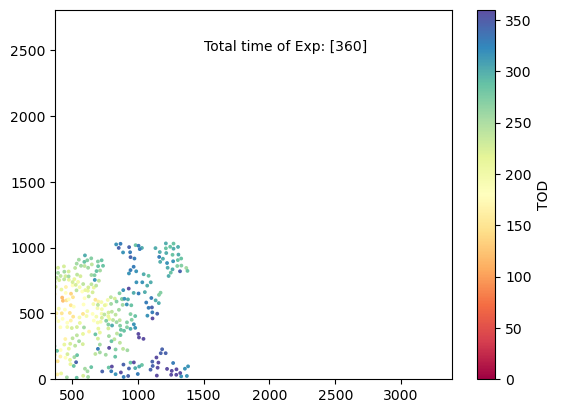

drawing exp_name20180514_HAP1_FB_xy2.csv


<Figure size 375900x280800 with 0 Axes>

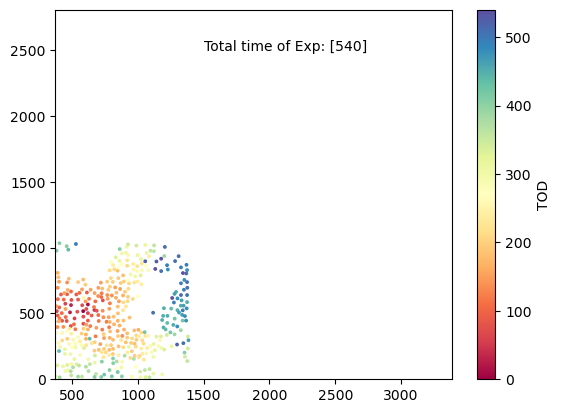

drawing exp_name20180514_HAP1_FB_xy3.csv


<Figure size 375900x280800 with 0 Axes>

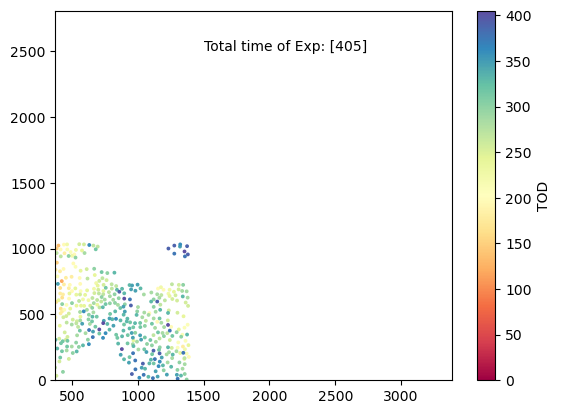

drawing exp_name20180514_HAP1_FB_xy4.csv


<Figure size 375900x280800 with 0 Axes>

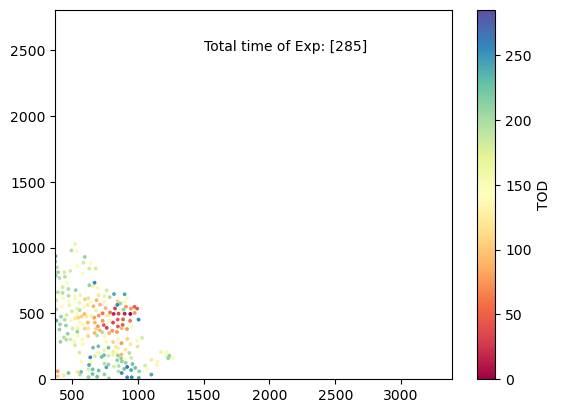

drawing exp_name20180514_HAP1_FB_xy5.csv


<Figure size 375900x280800 with 0 Axes>

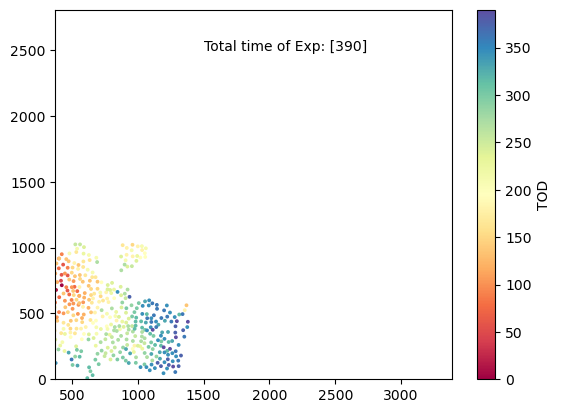

drawing exp_name20180620_HAP1_erastin_xy1.csv
drawing exp_name20180620_HAP1_erastin_xy10.csv
drawing exp_name20180620_HAP1_erastin_xy2.csv
drawing exp_name20180620_HAP1_erastin_xy3.csv
drawing exp_name20180620_HAP1_erastin_xy4.csv
drawing exp_name20180620_HAP1_erastin_xy5.csv
drawing exp_name20180620_HAP1_erastin_xy6.csv
drawing exp_name20180620_HAP1_erastin_xy7.csv
drawing exp_name20180620_HAP1_erastin_xy8.csv
drawing exp_name20180620_HAP1_erastin_xy9.csv
drawing exp_name20180905_U937_TSZ_xy1.csv
drawing exp_name20180905_U937_TSZ_xy2.csv
drawing exp_name20180905_U937_TSZ_xy3.csv
drawing exp_name20180905_U937_TSZ_xy5.csv
drawing exp_name20180905_U937_TSZ_xy9.csv
drawing exp_name20181227_MCF10A_SKT_xy1.csv
drawing exp_name20181227_MCF10A_SKT_xy2.csv
drawing exp_name20181227_MCF10A_SKT_xy3.csv
drawing exp_name20181227_MCF10A_SKT_xy4.csv
drawing exp_name20181227_MCF10A_SKT_xy5.csv
drawing exp_name20181229_HAP1-920H_FB_GCAMP_xy46.csv


<Figure size 375900x280800 with 0 Axes>

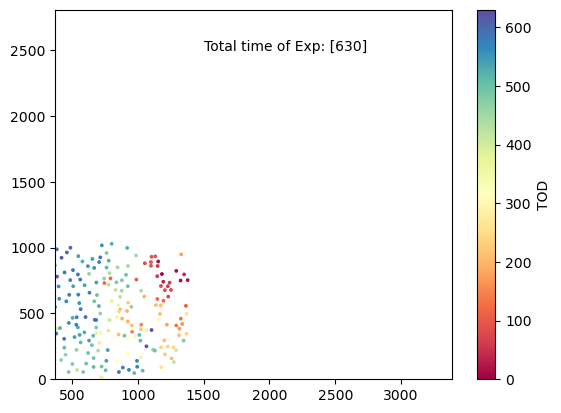

drawing exp_name20181229_HAP1-920H_FB_GCAMP_xy47.csv


<Figure size 375900x280800 with 0 Axes>

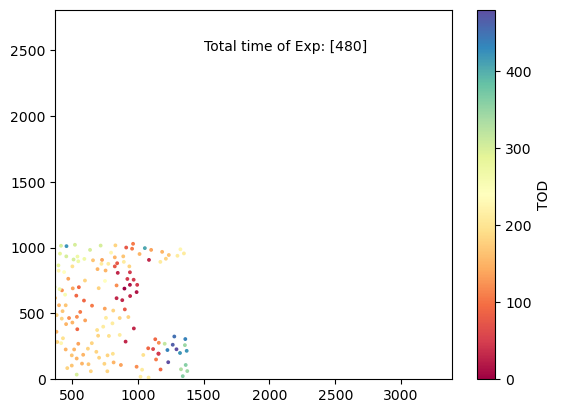

drawing exp_name20181229_HAP1-920H_FB_GCAMP_xy48.csv


<Figure size 375900x280800 with 0 Axes>

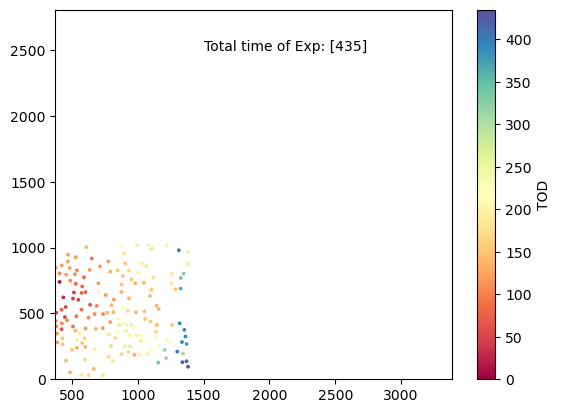

drawing exp_name20181229_HAP1-920H_FB_GCAMP_xy49.csv


<Figure size 375900x280800 with 0 Axes>

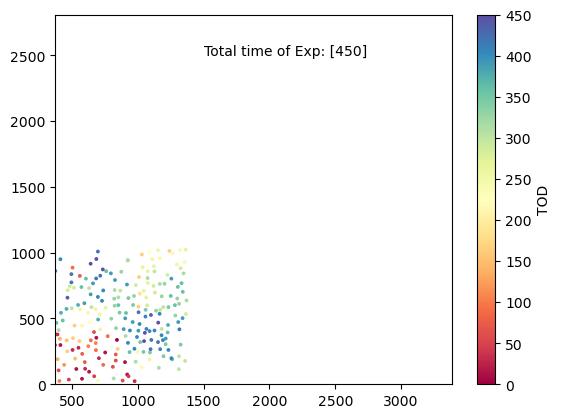

drawing exp_name20181229_HAP1-920H_FB_GCAMP_xy50.csv


<Figure size 375900x280800 with 0 Axes>

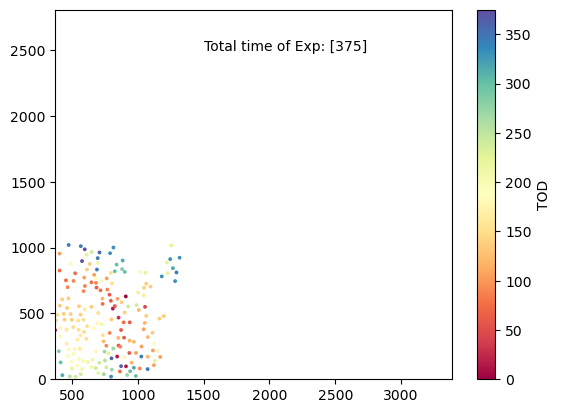

drawing exp_name20181229_HAP1-920H_FB+PEG1450_GCAMP_xy51.csv


<Figure size 375900x280800 with 0 Axes>

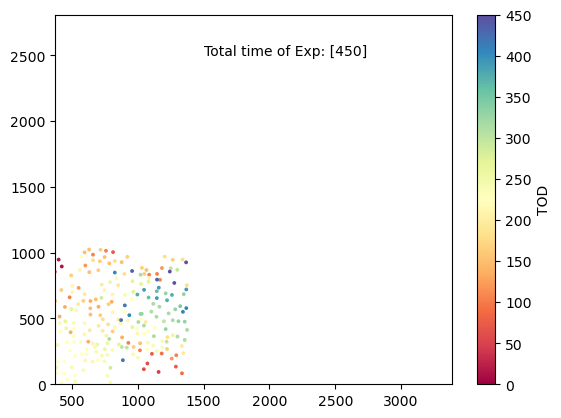

drawing exp_name20181229_HAP1-920H_FB+PEG1450_GCAMP_xy52.csv


<Figure size 375900x280800 with 0 Axes>

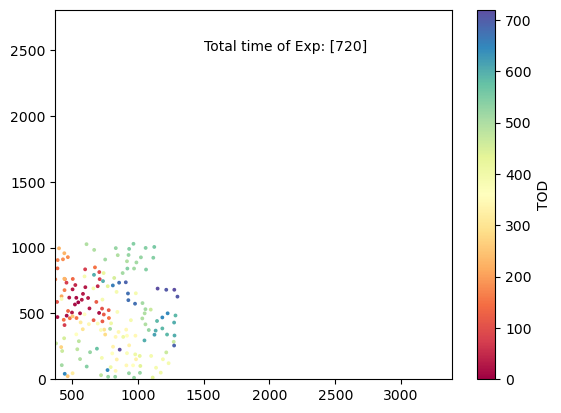

drawing exp_name20181229_HAP1-920H_FB+PEG1450_GCAMP_xy53.csv


<Figure size 375900x280800 with 0 Axes>

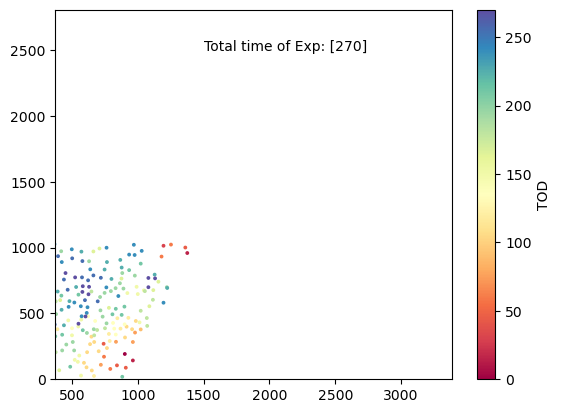

drawing exp_name20181229_HAP1-920H_FB+PEG1450_GCAMP_xy54.csv


<Figure size 375900x280800 with 0 Axes>

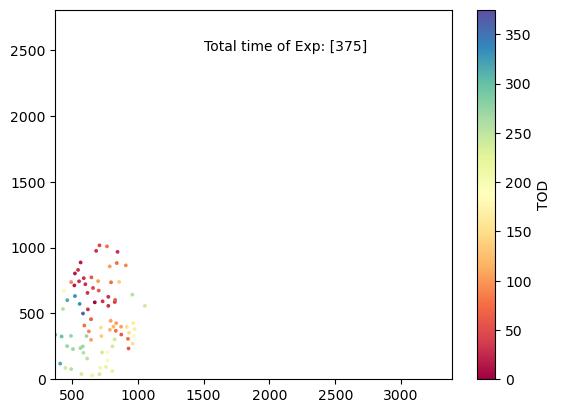

drawing exp_name20181229_HAP1-920H_FB+PEG1450_GCAMP_xy55.csv


<Figure size 375900x280800 with 0 Axes>

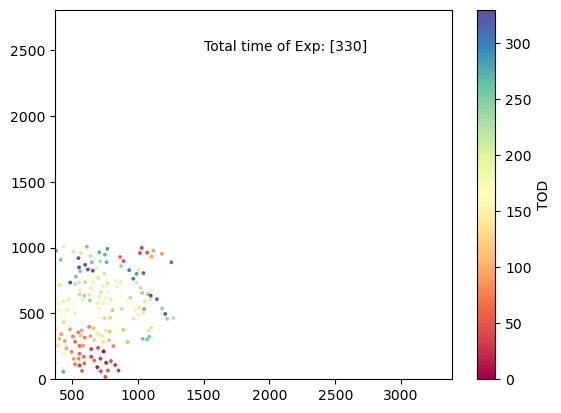

drawing exp_name20181229_HAP1-920H_FB+PEG3350_GCAMP_xy56.csv


<Figure size 375900x280800 with 0 Axes>

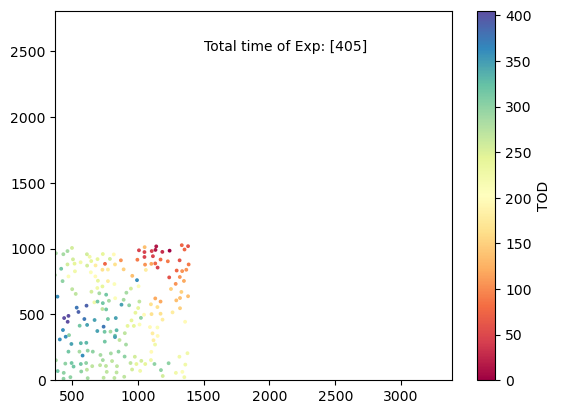

drawing exp_name20181229_HAP1-920H_FB+PEG3350_GCAMP_xy57.csv


<Figure size 375900x280800 with 0 Axes>

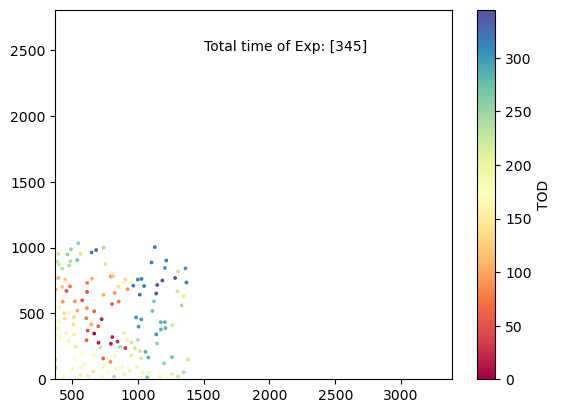

drawing exp_name20181229_HAP1-920H_FB+PEG3350_GCAMP_xy58.csv


<Figure size 375900x280800 with 0 Axes>

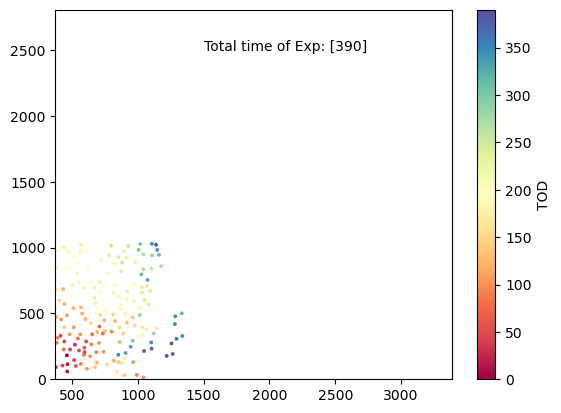

drawing exp_name20181229_HAP1-920H_FB+PEG3350_GCAMP_xy59.csv


<Figure size 375900x280800 with 0 Axes>

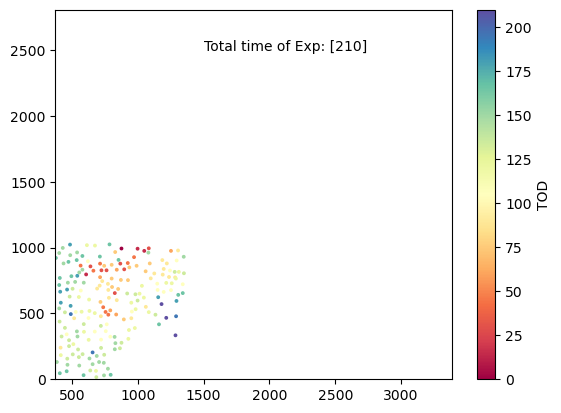

drawing exp_name20181229_HAP1-920H_FB+PEG3350_GCAMP_xy60.csv


<Figure size 375900x280800 with 0 Axes>

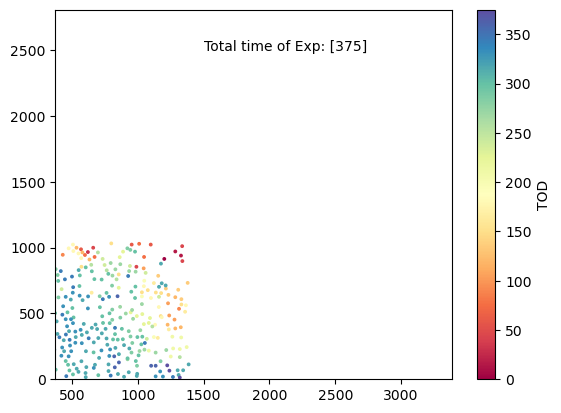

drawing exp_name20200311_HAP1_ML162_xy1.csv
drawing exp_name20200311_HAP1_ML162_xy2.csv
drawing exp_name20200311_HAP1_ML162_xy3.csv
drawing exp_name20200311_HAP1_ML162_xy4.csv
drawing exp_name20200311_HAP1_ML162_xy6.csv


In [68]:
# OLD DATA
exps_dir_name = "/Users/esraan/Library/CloudStorage/GoogleDrive-esraan@post.bgu.ac.il/My Drive/PhD materials/OldData/Experiments_XYT_CSV/OriginalTimeMinutesData"
meta_data_file_full_path= "/Users/esraan/Library/CloudStorage/GoogleDrive-esraan@post.bgu.ac.il/My Drive/PhD materials/OldData/Experiments_XYT_CSV/ExperimentsMetaData.csv"
meta_data_extract_exp_names= pd.read_csv(meta_data_file_full_path)
exp_names = list(meta_data_extract_exp_names.iloc[:96,1])

draw_cells_via_fixed_radious_according_to_xy_cordination_of_prevoius_data(exp_name = exp_names,
                                                                                           exps_dir_path=exps_dir_name,
                                                                                           meta_data_full_file_path=meta_data_file_full_path,
                                                                                           cells_fixed_radious = 3,
                                                                                           #treatment_to_include  = ["h2o2", "FAC"],#,
                                                                                           cell_line_to_include = ["hap1"],#,
                                                                                           treatment_to_include = ["FAC"])#["erastin", "c' dots", "h2o2", "PEG","FAC","ml162", "tsz", "trail"])

### GIF 

In [16]:
#NEW DATA
exps_dir_name = "/Users/esraan/Library/CloudStorage/GoogleDrive-esraan@post.bgu.ac.il/My Drive/PhD materials/2023DataSet/CSVs_trackmate_fiji/"
meta_data_file_full_path= "/Users/esraan/Library/CloudStorage/GoogleDrive-esraan@post.bgu.ac.il/My Drive/PhD materials/2023DataSet/2023ExperimentsMetaData.csv"
meta_data_extract_exp_names= pd.read_csv(meta_data_file_full_path)
exp_names = list(meta_data_extract_exp_names.iloc[8:12,1])
dir_path_to_save_gif_simulation = "/Users/esraan/Library/CloudStorage/GoogleDrive-esraan@post.bgu.ac.il/My Drive/PhD materials/"


In [17]:
draw_cells_gif_via_fixed_radious_according_to_xy_cordination_of_prevoius_data(exp_name=exp_names,
                                                                              exps_dir_path=exps_dir_name,
                                                                              meta_data_full_file_path=meta_data_file_full_path,
                                                                              cells_fixed_radious = 3,
                                                                              dir_path_to_save_gif_simulation=dir_path_to_save_gif_simulation)    

KeyboardInterrupt: 

## Global Death Rate

In [16]:
exps_dir_name = "/Users/esraan/Library/CloudStorage/GoogleDrive-esraan@post.bgu.ac.il/My Drive/PhD materials/OldData/Experiments_XYT_CSV/OriginalTimeMinutesData"
meta_data_file_full_path= "/Users/esraan/Library/CloudStorage/GoogleDrive-esraan@post.bgu.ac.il/My Drive/PhD materials/OldData/Experiments_XYT_CSV/ExperimentsMetaData.csv"
meta_data_extract_exp_names= pd.read_csv(meta_data_file_full_path)
exp_names = list(meta_data_extract_exp_names.iloc[:96,1])
x = calc_all_experiments_global_death_rate(exp_name=exp_names,
                                                                              exps_dir_path=exps_dir_name,
                                                                              meta_data_full_file_path=meta_data_file_full_path,
                                                                              time_scale = 30)

280
index: 0, sum till now: 1, 
index: 1, sum till now: 3, 
index: 2, sum till now: 7, 
index: 3, sum till now: 12, 
index: 4, sum till now: 16, 
index: 5, sum till now: 22, 
index: 6, sum till now: 32, 
index: 7, sum till now: 40, 
index: 8, sum till now: 54, 
index: 9, sum till now: 74, 
index: 10, sum till now: 86, 
index: 11, sum till now: 103, 
index: 12, sum till now: 123, 
index: 13, sum till now: 149, 
index: 14, sum till now: 170, 
index: 15, sum till now: 211, 
index: 16, sum till now: 243, 
index: 17, sum till now: 253, 
index: 18, sum till now: 264, 
index: 19, sum till now: 269, 
index: 20, sum till now: 275, 
index: 21, sum till now: 278, 
index: 22, sum till now: 280, 
244
index: 0, sum till now: 1, 
index: 1, sum till now: 4, 
index: 2, sum till now: 7, 
index: 3, sum till now: 12, 
index: 4, sum till now: 21, 
index: 5, sum till now: 41, 
index: 6, sum till now: 69, 
index: 7, sum till now: 112, 
index: 8, sum till now: 162, 
index: 9, sum till now: 183, 
index: 10, su

In [17]:
df = pd.DataFrame()
for value in list(x.values()):
    # print(value)
    df_temp = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in value.items() ]))
    df = pd.concat([df,df_temp])
df.dropna(inplace=True)
df_avg = df.groupby(['Time', 'Treatment'], as_index=False,dropna=True)['Death rate'].mean()
df_avg["std"] =df.groupby(['Time', 'Treatment'], as_index=False)['Death rate'].std()['Death rate']


In [25]:
df_avg.to_csv("global_death_rate.csv")

In [16]:
import itertools
marker = itertools.cycle(['o', '^', '*', '8', 's', 'p', 'd', 'v'])
markers = [next(marker) for i in df["Treatment"].unique()]


In [24]:
HAP1_cells_exp = df[df["Treatment"].str.startswith("HAP1")]

/var/folders/j0/1phmklgx147_1zwyhdlsqgq40000gn/T/ipykernel_984/1448381951.py:5: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  plot_bar = sns.pointplot(ax=ax, data=HAP1_cells_exp,palette=sns.color_palette("colorblind"), x="Time", y="Death rate",\


Text(0.5, 0, 'Time(min)')

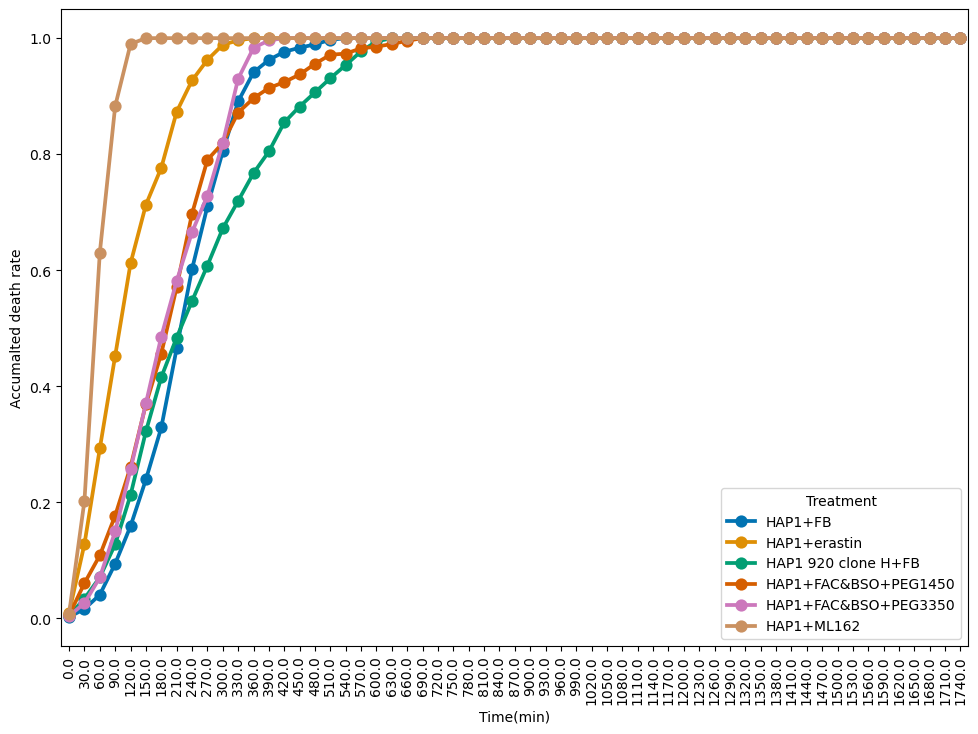

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
plot_bar = sns.pointplot(ax=ax, data=HAP1_cells_exp,palette=sns.color_palette("colorblind"), x="Time", y="Death rate",\
                         errorbar=None, hue="Treatment")#, markers=markers)#, dodge =True, scale =0.5),palette=sns.color_palette("colorblind"),estimator="mean",errorbar=None,
ax.tick_params(axis='x', rotation=90)
plt.ylabel("Accumalted death rate")
plt.xlabel("Time(min)")
# x_coords = []
# y_coords = []
# for point_pair in plot_bar.collections:
#     for x, y in point_pair.get_offsets():
#         x_coords.append(x)
#         y_coords.append(y)
# ax.errorbar(x_coords, y_coords, yerr=df_avg["std"], fmt=' ', zorder=-1)

/var/folders/j0/1phmklgx147_1zwyhdlsqgq40000gn/T/ipykernel_984/2852619233.py:6: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  plot_bar = sns.pointplot(ax=ax, data=HAP1_cells_exp,palette=sns.color_palette("colorblind"), x="Time", y="Death rate",\


Text(0.5, 0, 'Time(min)')

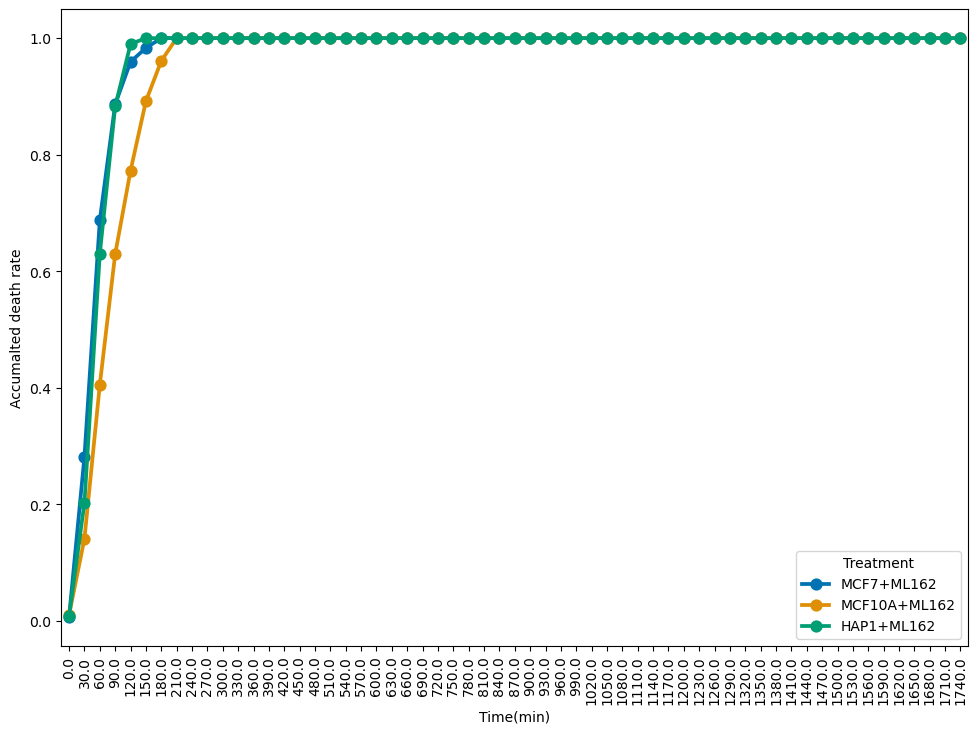

In [52]:
HAP1_cells_exp = df[df["Treatment"].str.contains("ML162")]
import seaborn as sns
import matplotlib.pyplot as plt
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
plot_bar = sns.pointplot(ax=ax, data=HAP1_cells_exp,palette=sns.color_palette("colorblind"), x="Time", y="Death rate",\
                         errorbar=None, hue="Treatment")#, markers=markers)#, dodge =True, scale =0.5),palette=sns.color_palette("colorblind"),estimator="mean",errorbar=None,
ax.tick_params(axis='x', rotation=90)
plt.ylabel("Accumalted death rate")
plt.xlabel("Time(min)")
# x_coords = []
# y_coords = []
# for point_pair in plot_bar.collections:
#     for x, y in point_pair.get_offsets():
#         x_coords.append(x)
#         y_coords.append(y)
# ax.errorbar(x_coords, y_coords, yerr=df_avg["std"], fmt=' ', zorder=-1)

In [10]:
import numpy as np
vector_death_rate = np.diff(df['Death rate']) / np.diff(df['Time'])

vector_death_rate= vector_death_rate.tolist()
df['Death rate diff'] = vector_death_rate+[0]
vector_time = (np.array(df['Time'])[:-1] + np.array(df['Time'])[1:]) / 2
vector_time = vector_time.tolist()
df['Time diff'] = vector_time+[vector_time[-1]+30]

Text(0.5, 0, 'Time(min)')

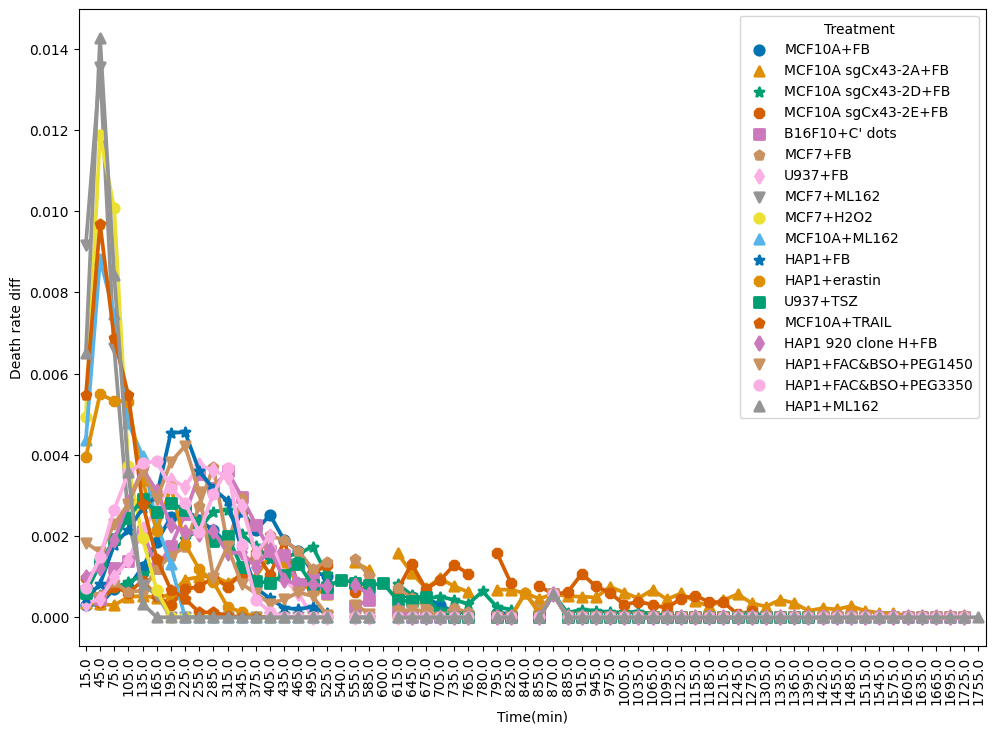

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
plot_bar = sns.pointplot(ax=ax, data=df,palette=sns.color_palette("colorblind"), x="Time diff", y="Death rate diff",\
                         errorbar=None, hue="Treatment", markers=markers)#, dodge =True, scale =0.5),palette=sns.color_palette("colorblind"),estimator="mean",errorbar=None,
ax.tick_params(axis='x', rotation=90)
plt.ylabel("Death rate diff")
plt.xlabel("Time(min)")
# x_coords = []
# y_coords = []
# for point_pair in plot_bar.collections:
#     for x, y in point_pair.get_offsets():
#         x_coords.append(x)
#         y_coords.append(y)
# ax.errorbar(x_coords, y_coords, yerr=df_avg["std"], fmt=' ', zorder=-1)

Text(0.5, 1.0, 'variable, symmetric error')

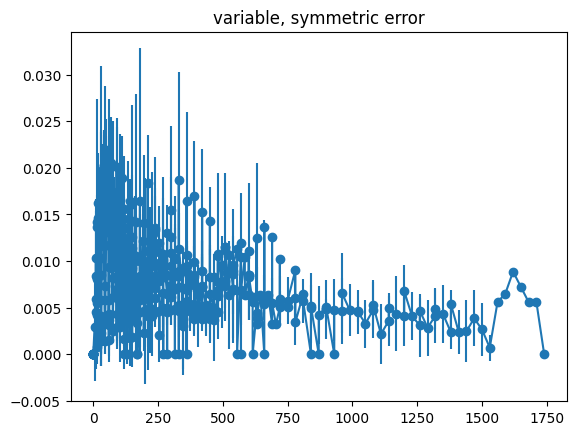

In [5]:
fig, ax = plt.subplots()
ax.plot()
ax.errorbar( df_avg["Time"], df_avg["Death rate"], yerr=df_avg["std"], fmt='-o', label= df_avg["Treatment"])
ax.set_title('variable, symmetric error')

In [12]:
d_avg = df.groupby(['Time', 'Treatment'], as_index=False)['Death rate'].mean()

In [65]:
from collections import Counter
from math import log
# Count the frequency of unique values
counts = Counter(cells_tod.flatten())
total_cells= len(cells_tod)
new_list = []
# Print the results
for value, count in counts.items():
    print(f"{value} occurs {count} times")
    new_list.append((value,log(count/total_cells)))#(-1)*


0 occurs 1 times
30 occurs 2 times
60 occurs 8 times
90 occurs 16 times
120 occurs 27 times
150 occurs 30 times
180 occurs 30 times
210 occurs 40 times
240 occurs 58 times
270 occurs 57 times
300 occurs 38 times
330 occurs 28 times
360 occurs 24 times
390 occurs 5 times
420 occurs 11 times
450 occurs 3 times
480 occurs 5 times
510 occurs 1 times
540 occurs 4 times
570 occurs 1 times
600 occurs 1 times
630 occurs 1 times


In [18]:
from collections import Counter
from math import log
# Count the frequency of unique values
cells_locis, cells_tod = read_experiment_cell_xy_and_death_times(exp_full_path="/Users/esraan/Library/CloudStorage/GoogleDrive-esraan@post.bgu.ac.il/My Drive/PhD materials/OldData/Experiments_XYT_CSV/OriginalTimeMinutesData/20160909_b16f10_aMSH_xy38.csv")
death_rate_calculation_in_different_timeframes(time_scale=1, cells_tods=cells_tod)


328
index: 0, sum till now: 1, 
index: 1, sum till now: 15, 
index: 2, sum till now: 22, 
index: 3, sum till now: 39, 
index: 4, sum till now: 56, 
index: 5, sum till now: 90, 
index: 6, sum till now: 109, 
index: 7, sum till now: 142, 
index: 8, sum till now: 160, 
index: 9, sum till now: 191, 
index: 10, sum till now: 212, 
index: 11, sum till now: 251, 
index: 12, sum till now: 289, 
index: 13, sum till now: 309, 
index: 14, sum till now: 323, 
index: 15, sum till now: 328, 


{'Time': [0,
  30,
  60,
  90,
  120,
  150,
  180,
  210,
  240,
  270,
  300,
  330,
  360,
  390,
  420,
  450],
 'Death rate': [0.003048780487804878,
  0.04573170731707317,
  0.06707317073170732,
  0.11890243902439024,
  0.17073170731707318,
  0.27439024390243905,
  0.3323170731707317,
  0.4329268292682927,
  0.4878048780487805,
  0.5823170731707317,
  0.6463414634146342,
  0.7652439024390244,
  0.8810975609756098,
  0.9420731707317073,
  0.9847560975609756,
  1.0]}

## Visualization-90%

<Figure size 375900x280800 with 0 Axes>

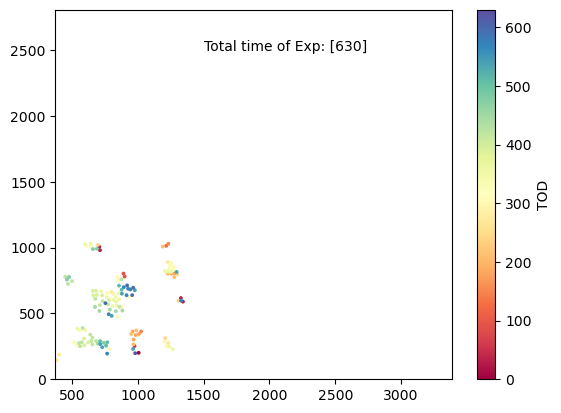

<Figure size 375900x280800 with 0 Axes>

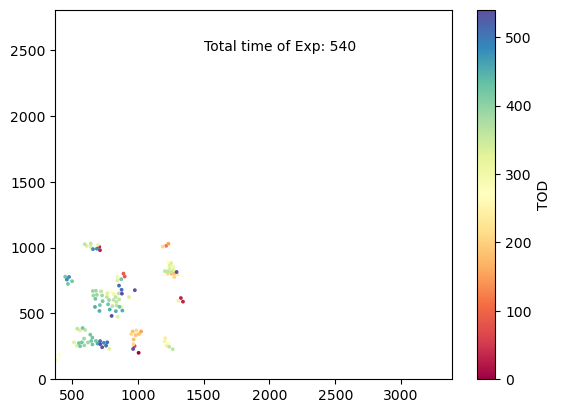

In [65]:
def draw_cells_via_fixed_radious_according_to_xy_cordination_of_prevoius_data_single_exp(cells_location: list,
                                                                                         cells_tod:list,
                                                                                         cells_fixed_radious: int,
                                                                                         **kwargs):
    
    plt.figure(figsize=(3759,2808))
    size = [math.pi * (cells_fixed_radious**2)]*len(cells_tod)
    cmap = plt.cm.Spectral
    fig, ax = plt.subplots()
    cells_loci_x = [x[0] for x in cells_location]
    cells_loci_y = [x[1] for x in cells_location]
    percentile_flag = kwargs.get("percentile_flag",False)
    
    if percentile_flag:
        percentile_val = np.percentile(cells_tod,90)
        cells_tod = cells_tod[cells_tod<=percentile_val]
        cells_loci_x = cells_loci_x[:len(cells_tod)]
        cells_loci_y = cells_loci_y[:len(cells_tod)]
    facecolors = [cm.Spectral(x) for x in cells_tod]
    ax.axis('equal')
    plt.scatter(x=cells_loci_x, y= cells_loci_y,c =cells_tod,s=cells_fixed_radious, cmap=cmap,vmin=0, vmax=max(cells_tod)) #, ec="k",vmin=0, vmax=600
    cbar = plt.colorbar()   
    cbar.set_label('TOD')
    ax.annotate("Total time of Exp: "+str(max(cells_tod)),xy=(1500,2500))
    plt.xlim(0,3759)
    plt.ylim(0,2808)
    plt.show()

exp_full_path = "/Users/esraan/Library/CloudStorage/GoogleDrive-esraan@post.bgu.ac.il/My Drive/PhD materials/OldData/Experiments_XYT_CSV/OriginalTimeMinutesData/20160828_10Awt_FB_xy03.csv"
cells_locis, cells_tod = read_experiment_cell_xy_and_death_times(exp_full_path=exp_full_path)
draw_cells_via_fixed_radious_according_to_xy_cordination_of_prevoius_data_single_exp(cells_location=cells_locis,
                                                                                             cells_tod= cells_tod,
                                                                                            cells_fixed_radious=3,
                                                                                            )

draw_cells_via_fixed_radious_according_to_xy_cordination_of_prevoius_data_single_exp(cells_location = cells_locis,
                                                                                             cells_tod = cells_tod,
                                                                                            cells_fixed_radious = 3,
                                                                                            percentile_flag = True
                                                                                            )